In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import deepjets as dj
import seaborn
from keras.optimizers import Adam

Using Theano backend.


//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
n_images = 5000
n_folds = 2
test_frac = 0.1
val_frac = 0.1
sig_file = 'images/w_images.h5'
bkd_file = 'images/qcd_images.h5'
dataset_name = 'datasets/w'
model_name = 'models/maxout_w'

In [5]:
h5_files = dj.utils.prepare_datasets(
    sig_file, bkd_file, dataset_name, n_sig=n_images, n_bkd=n_images, test_frac=test_frac,
    val_frac=val_frac, n_folds=n_folds, auxvars=['weights'], shuffle=True, shuffle_seed=1)

In [7]:
gs_results = dj.learning.optimizer_grid_search(
    djm.get_maxout, (25**2,), Adam, {'lr' : [0.001]},
    h5_files['train'], model_name=model_name, verbose=2, max_jobs=1, log_to_file=False)

Compiling models...

Cross-validating models...

Optimizer parameters = {'lr': 0.001}, k-fold = 0
Training on 4050 samples, validating on 450 samples.
Datasets from datasets/w_train_kf0.h5.
Epoch 70/100: epochs w/o increase = 10, AUC = 28.486617822                    
Patience tolerance reached.
Training complete. Best validation AUC = 55.912211199
Testing on 4500 samples.
Dataset from datasets/w_train_kf0.h5.
Score    = 0.445037172053
AUC      = 23.7959321426
Accuracy = 3641/4500 = 0.809111111111

Optimizer parameters = {'lr': 0.001}, k-fold = 1
Training on 4050 samples, validating on 450 samples.
Datasets from datasets/w_train_kf1.h5.
Epoch 32/100: epochs w/o increase = 10, AUC = 15.2821209092                    
Patience tolerance reached.
Training complete. Best validation AUC = 18.4300409481
Testing on 4500 samples.
Dataset from datasets/w_train_kf1.h5.
Score    = 0.483696432749
AUC      = 20.3581577033
Accuracy = 3488/4500 = 0.775111111111



Testing on 1000 samples.
Dataset from datasets/w_test.h5.
Score    = 0.447424693108
AUC      = 30.5138328965
Accuracy = 812/1000 = 0.812



//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


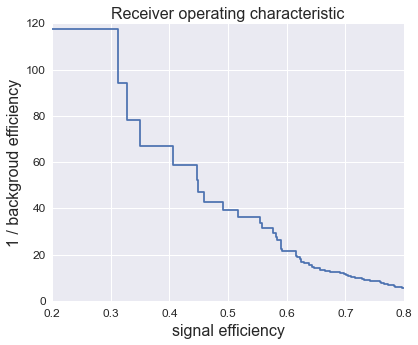

In [9]:
_ = dj.learning.test_model(djm.load_model(model_name+'_gp0_kf0'), h5_files['test'])

In [ ]:
print dj.learning.select_best_model(gs_results)